In [1]:
# Importing dependecies:
import numpy as np
import pandas as pd
# from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import os

# Configuring Notebook environment:
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.figsize'] = (10.0, 7.5)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import utils

# 6.0 Machine Learning Processing:

## 6.1.0 Linear Regression

### 6.1.1 Linear Regression - To predict product prices

In [35]:
df_clean = pd.read_csv('df_clean.csv')
df_clean.columns

Index(['product_id', 'store_id', 'week_no', 'display', 'mailer',
       'household_key', 'basket_id', 'day', 'quantity', 'sales_value',
       'retail_disc', 'trans_time', 'coupon_disc', 'coupon_match_disc',
       'description', 'campaign', 'start_day', 'end_day', 'manufacturer',
       'department', 'brand', 'commodity_desc', 'sub_commodity_desc',
       'curr_size_of_product', 'coupon_upc', 'age_desc', 'marital_status_code',
       'income_desc', 'homeowner_desc', 'hh_comp_desc', 'household_size_desc',
       'kid_category_desc', 'affinity_raw', 'affinity_rank_pct',
       'affinity_rank_centered', 'affinity_log', 'affinity_log_scaled',
       'affinity_rank_buckets', 'affinity_score'],
      dtype='object')

In [ ]:
cols = ['mailer', 'brand', 'commodity_desc']
for name in cols:
    print(name,':')
    print(df_clean[name].value_counts(),'\n')

In [38]:
df_clean['brand'] = df_clean['brand'].astype('category').cat.codes
df_clean['mailer'] = df_clean['mailer'].astype('category').cat.codes
df_clean['commodity_desc'] = df_clean['commodity_desc'].astype('category').cat.codes

In [39]:
# Calculating a simple linear regression, even though it is not the most effective way to train the dataset on:
X = df_clean[['product_id', 'manufacturer', 'retail_disc', 'coupon_match_disc', 'commodity_desc', 'brand', 'mailer']].values
y = df_clean['sales_value'].values.reshape(-1, 1)
X.shape, y.shape

((2993709, 7), (2993709, 1))

In [40]:
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

X_train.shape, y_train.shape

//anaconda3/envs/Springboard/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


((2394967, 7), (2394967, 1))

In [41]:
clf = LinearRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.300746143191417

In [42]:
for X, y in zip(X_test[:50], y_test[:50]):
    print(f"Model: {clf.predict([X])[0]}, Actual: {y}, Percentile: {round((clf.predict([X])[0]/y)*100.00, 2)}%")

TypeError: type numpy.ndarray doesn't define __round__ method

ValueError: x and y must be the same size

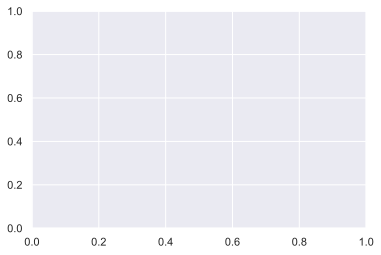

In [43]:
plt.scatter(X_train[:50], y_train[:50], color = 'red')
plt.plot(X_train[:50], linearRegressor.predict(X_train[:50]), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## 6.2 Classification

### 6.2.1 RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
label_enc = preprocessing.LabelEncoder()
y_train_encoded = label_enc.fit_transform(y_train)
y_test_encoded = label_enc.fit_transform(y_test)

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, verbose=True)
clf.fit(X_train, y_train_encoded)
clf.score(X_test, y_test_encoded)

In [ ]:
for X, y in zip(X_test[:100], y_test_encoded[:100]):
    print(f"Model: {clf.predict([X])[0]}, Actual: {y}, Percentile: {round((clf.predict([X])[0]/y)*100.00, 2)}%")

## 6.2.2 Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
label_enc = preprocessing.LabelEncoder()
# X_train_encoded = label_enc.fit_transform(X_train)
# X_test_encoded = label_enc.fit_transform(X_test)
y_train_encoded = label_enc.fit_transform(y_train)
y_test_encoded = label_enc.fit_transform(y_test)

gnb = GaussianNB()
gnb.fit(X_train, y_train_encoded)
gnb.score(X_test, y_test_encoded)

In [ ]:
for X, y in zip(X_test[:100], y_test_encoded[:100]):
    print(f"Model: {clf.predict([X])[0]}, Actual: {y}, Percentile: {round((clf.predict([X])[0]/y)*100.00, 2)}%")

## 6.3 Clustering

### 6.3.1 KMeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0, verbose=0)

In [ ]:
kmeans.fit(X_train)
kmeans.cluster_centers_
kmeans.labels_

### 6.3.2 Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
clustering = SpectralClustering(n_clusters=2, assign_labels="discretize", random_state=0)
clustering.fit(X_train, y_encoded_train)
clustering.score(X_test, y_encoded_test)

In [ ]:
for X, y in zip(X_test[:100], y_test_encoded[:100]):
    print(f"Model: {clf.predict([X])[0]}, Actual: {y}")

### 6.3.3 GMM

In [ ]:
from sklearn.mixture import GMM